# try some things 

So far just solving pH as Ca2+ increases as portlandite dissolves

set maximum portlandite based on Ksp value (Ca_inf)

and kinetics with a simple first order rate constant.

In [1]:
function CaT=CaTvtime(p,t)

Cainf=p(1); k=p(2); %CaT(1)=0;

%for i=2:length(t)
%CaT(i)=Cainf*(1-exp(-k*t(i)));
%end

CaT=Cainf*(1-exp(-k*t));

end

In [2]:

function pH=pHfromCaT(CaT,NaT)

% equilibrium constants
Kw=10^-14; Ka1=10^-6.3; Ka2=10^-10.3; PCO2=10^-3.5; KH=10^-1.47;  

a=1;
b=2*CaT+NaT; %if there is initial alkalinity
c=-KH*Ka1*PCO2-Kw;
d=-2*KH*Ka1*Ka2*PCO2;
t=roots([a b c d]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);


end


In [3]:
function pH=pHfromCaTalmostclosed(CaT,NaT)

% equilibrium constants
Kw=10^-14; Ka1=10^-6.3; Ka2=10^-10.3; PCO2=10^-26.5; KH=10^-1.47;  

a=1;
b=2*CaT+NaT; %if there is initial alkalinity
c=-KH*Ka1*PCO2-Kw;
d=-2*KH*Ka1*Ka2*PCO2;
t=roots([a b c d]);
t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);


end

In [4]:
function pH=pHfromCaTclosed(CaT,CT,NaT)

% equilibrium constants
Kw=10^-14; Ka1=10^-6.3; Ka2=10^-10.3; 

a=1;
b=2*CaT+Ka1+NaT;
c=2*CaT*Ka1+NaT*Ka1+Ka1*Ka2-CT*Ka1-Kw;
d=2*CaT*Ka1*Ka2+NaT*Ka1*Ka2-CT*Ka1*Ka2-Kw*Ka1;
e=-Kw*Ka1*Ka2;
t=roots([a b c d e]);


t=t(imag(t)==0); %sets any imaginary roots to zero
% display the positive real root
t=t(t>0);
pH=-log10(t);


end

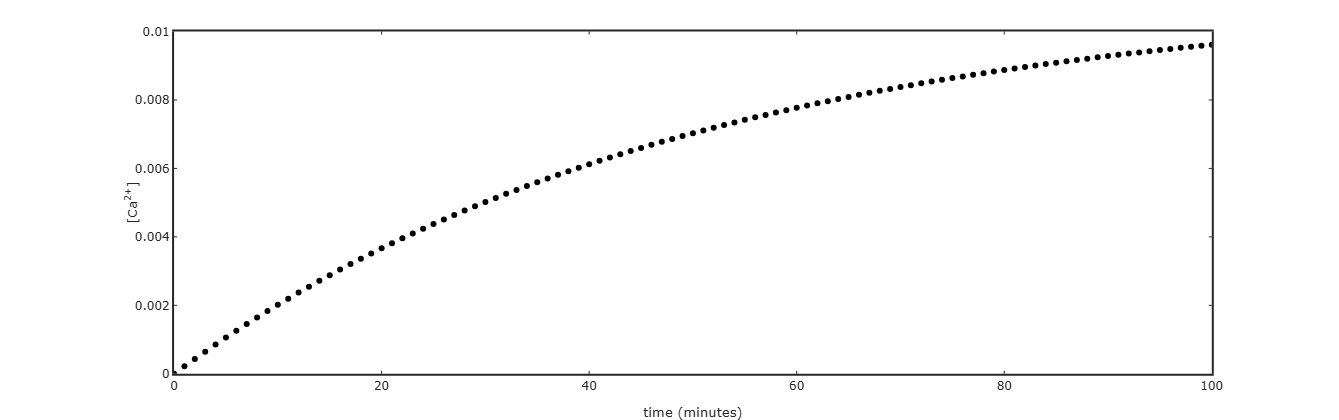

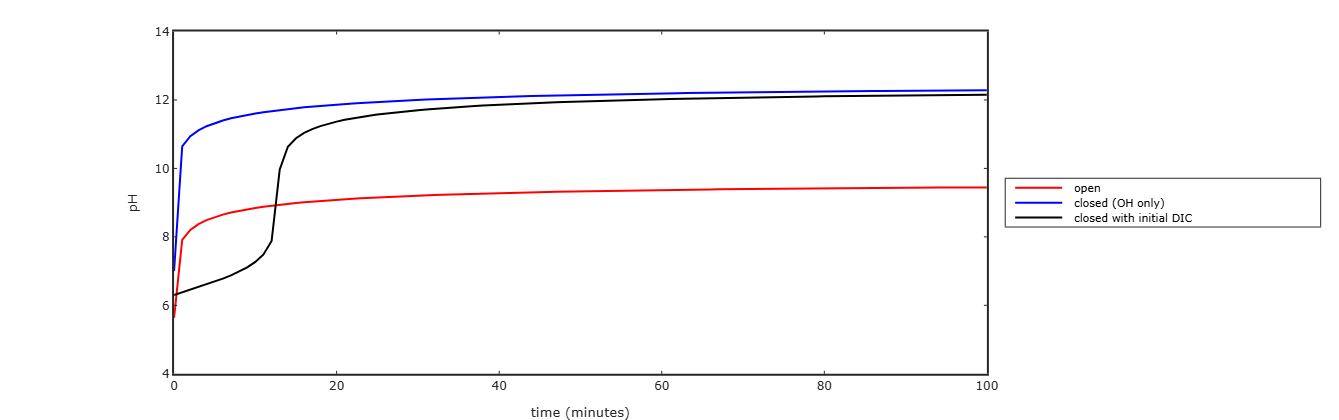

In [5]:
% increase Ca versus time by dissolution of portlandite
% and model pH increase

graphics_toolkit ("plotly");

% https://socratic.org/questions/how-can-i-calculate-solubility-of-calcium-hydroxide

Ksp=5.5e-6; k=2e-2; Cainf=(Ksp*1/4)^(1/3); p=[Cainf k];
CT=0.01; NaT=0.00075;

time=0:1:100;
CaT=CaTvtime(p,time);
figure(1); plot(time,CaT,'ko')
xlabel('time (minutes)'); ylabel('[Ca^{2+}]')
set(gca,'linewidth',2,'fontsize',12)

% for each timestep solve for pH
for i=1:length(time)
    %pH(i)=pHfromCaT(CaT(i),NaT);
    %pHlowCO2(i)=pHfromCaTalmostclosed(CaT(i),NaT); % just OH from Ca(OH)2 dissolution
    pH(i)=pHfromCaT(CaT(i),0); % ignore initial alkalinity
    pHlowCO2(i)=pHfromCaTalmostclosed(CaT(i),0); % just OH from Ca(OH)2 dissolution. ignore initial alkalinity
    pHclosed(i)=pHfromCaTclosed(CaT(i),CT,0.005);  % NaT for initial alkalinity. otherwise start acidic (H2CO3)
end

%pH(1) %same as rainwater
%pHlowCO2(1) % neutral

figure(2); plot(time,pH,'r-','linewidth',2,time,pHlowCO2,'b-','linewidth',2,time,pHclosed,'k-','linewidth',2)
xlabel('time (minutes)'); ylabel('pH')
legend('open','closed (OH only)','closed with initial DIC','location','eastoutside')
set(gca,'linewidth',2,'fontsize',12)





